In [2]:
import pandas as pd
import seaborn as sns
from seaborn import set_palette
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
df = pd.read_csv("dataset.csv")
set_palette("coolwarm")

<AxesSubplot:>

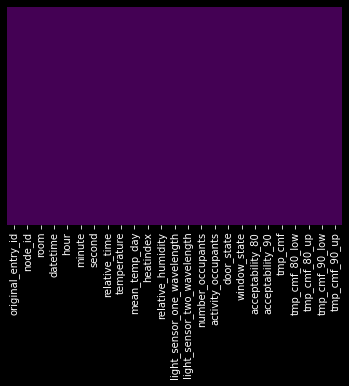

In [4]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [5]:
df.columns

Index(['original_entry_id', 'node_id', 'room', 'datetime', 'hour', 'minute',
       'second', 'relative_time', 'temperature', 'mean_temp_day', 'heatindex',
       'relative_humidity', 'light_sensor_one_wavelength',
       'light_sensor_two_wavelength', 'number_occupants', 'activity_occupants',
       'door_state', 'window_state', 'acceptability_80', 'acceptability_90',
       'tmp_cmf', 'tmp_cmf_80_low', 'tmp_cmf_80_up', 'tmp_cmf_90_low',
       'tmp_cmf_90_up'],
      dtype='object')

# Univariate
## original_entry_id
Description: Data is concatinated from multiple days/rooms, these are the original entry id's from those sources.

In [6]:
df['original_entry_id'].describe()

count    540364.000000
mean       2647.015486
std        2209.330762
min           1.000000
25%         939.000000
50%        2050.000000
75%        3836.000000
max       13349.000000
Name: original_entry_id, dtype: float64

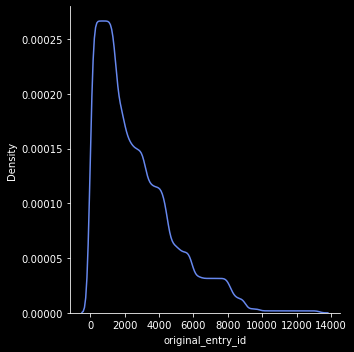

In [7]:
sns.displot(data=df, x='original_entry_id', kind="kde")

<AxesSubplot:xlabel='original_entry_id'>

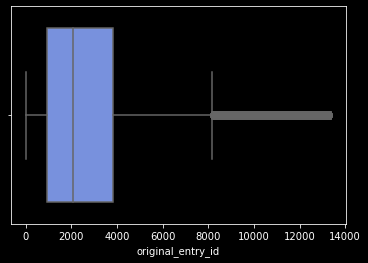

In [52]:
sns.boxplot(x="original_entry_id", data=df)

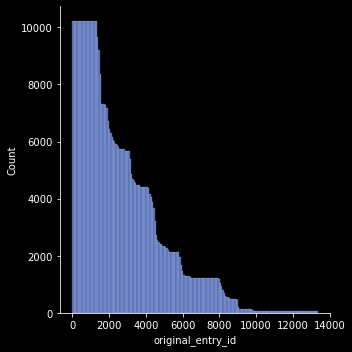

In [8]:
sns.displot(data=df, x='original_entry_id')

### result

Data description:
+ type: Discrete numerical
+ distribution: Positively skewed


## node_id

Description: At what place in the room the data was collected from

In [9]:
df['node_id'].describe()

count    540364.000000
mean          2.477682
std           1.176078
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: node_id, dtype: float64

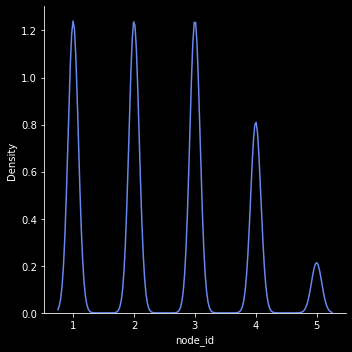

In [10]:
sns.displot(data=df, x='node_id', kind="kde")

<AxesSubplot:xlabel='node_id'>

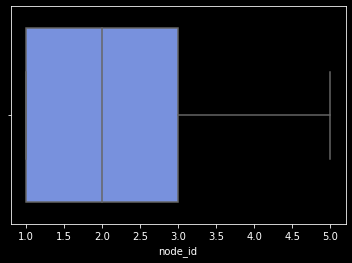

In [53]:
sns.boxplot(x="node_id", data=df)

<AxesSubplot:xlabel='node_id', ylabel='count'>

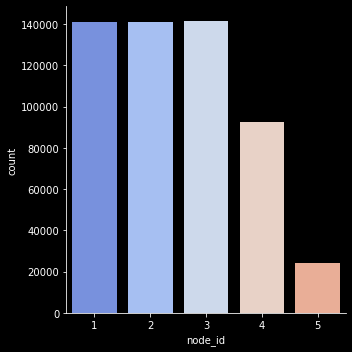

In [11]:
sns.catplot(x="node_id", data=df, kind='count', order=[1,2,3,4,5]).facet_axis(0, 0)

### result

Data description:
+ type: Discrete numerical
+ distribution: Positively skewed

## room

Which room was used, see floor plans section of the readme [readme](https://github.com/AvansETI/SmartGridAI/blob/b4bux/dataset/B4B%20Human%20Wellbeing%20Prediction/Dataset/README.MD)

In [12]:
df['room'].describe()

count     540364
unique         3
top            A
freq      273145
Name: room, dtype: object

<AxesSubplot:xlabel='room', ylabel='count'>

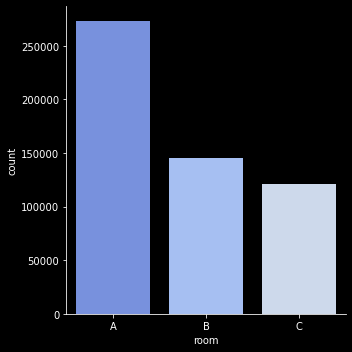

In [51]:
sns.catplot(x="room", data=df, kind='count', order=["A","B","C"]).facet_axis(0, 0)

### result

Data description:
+ type: Discrete numerical
+ distribution: Positively skewed


## date

Datetime reading

In [14]:
date_and_count_array = {}
for index, row in df.iterrows():
    date = row['datetime'][0:7]
    if date in date_and_count_array:
        date_and_count_array[date] = date_and_count_array.get(date, 0) + 1
    else:
        date_and_count_array[date] = 1

In [15]:
date_count_dataframe = pd.DataFrame(data=date_and_count_array.items(), columns=['date', 'count'])
date_count_dataframe.head()

,date,count
0,2016-03,236420
1,2016-04,182518
2,2017-01,63427
3,2017-02,57999


<AxesSubplot:xlabel='date', ylabel='count'>

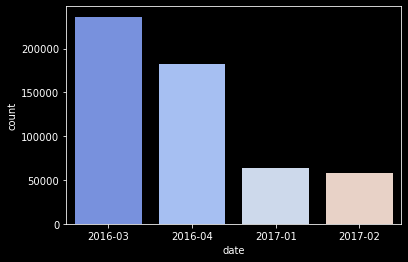

In [16]:
sns.barplot( data=date_count_dataframe, x="date", y="count", order=date_count_dataframe['date'])

### result

Data description:
+ type: Continuous numerical
+ distribution: Positively skewed


## temperature
Temperature in Celsius

In [17]:
df['temperature'].describe()

count    540364.000000
mean         21.966373
std           0.729373
min          20.420000
25%          21.370000
50%          22.020000
75%          22.400000
max          25.470000
Name: temperature, dtype: float64

<AxesSubplot:xlabel='temperature'>

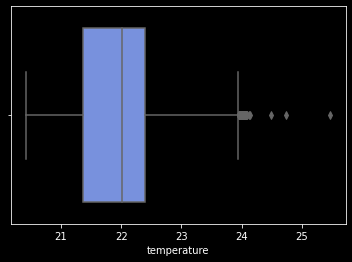

In [57]:
sns.boxplot(x="temperature", data=df)

<AxesSubplot:xlabel='temperature', ylabel='Count'>

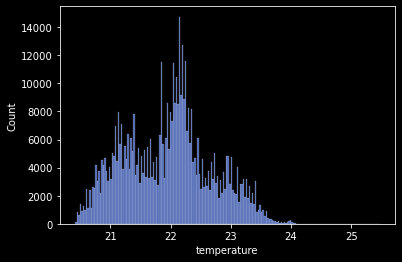

In [18]:
sns.histplot(x="temperature", data=df)

Data description:
+ type: Continuous numerical
+ distribution: Normal

## mean_temp_day
The mean temperature from the day of the reading in Mannheim Germany (place where the study took place)

In [19]:
df['mean_temp_day'].describe()

count    540364.000000
mean          7.658971
std           4.082586
min          -3.100000
25%           6.000000
50%           7.300000
75%          10.400000
max          14.700000
Name: mean_temp_day, dtype: float64

<AxesSubplot:xlabel='mean_temp_day'>

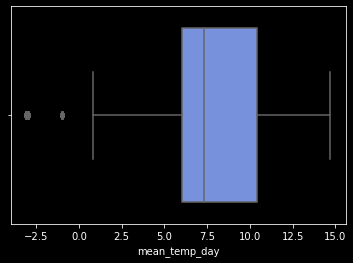

In [58]:
sns.boxplot(x="mean_temp_day", data=df)

<AxesSubplot:xlabel='mean_temp_day', ylabel='Count'>

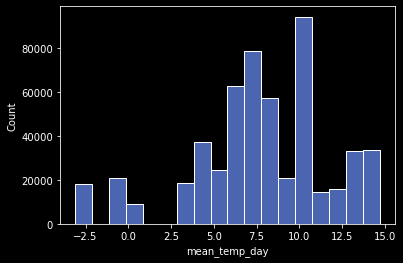

In [20]:
sns.histplot(x="mean_temp_day", data=df, bins=18)

Data description:
+ type: Continuous numerical
+ distribution: Negatively skewed

## heatindex

What the temperature feels like

In [21]:
df['heatindex'].describe()

count    540364.000000
mean         21.660889
std           0.609236
min          20.493466
25%          21.198088
50%          21.575511
75%          21.980674
max          25.386476
Name: heatindex, dtype: float64

<AxesSubplot:xlabel='heatindex'>

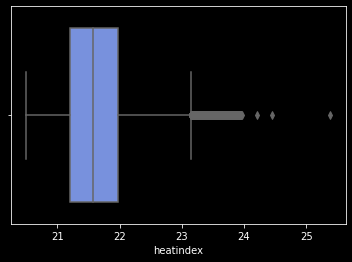

In [59]:
sns.boxplot(x="heatindex", data=df)

<AxesSubplot:xlabel='heatindex', ylabel='Count'>

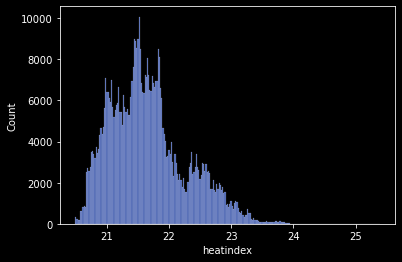

In [22]:
sns.histplot(x="heatindex", data=df)

Data description:
+ type: Continuous numerical
+ distribution: Negatively skewed

## relative_humidity

Percentage of humidity in the air

In [23]:
df['relative_humidity'].describe()

count    540364.000000
mean         47.491489
std           6.286487
min          34.516000
25%          42.737000
50%          46.301000
75%          52.255000
max          65.376000
Name: relative_humidity, dtype: float64

<AxesSubplot:xlabel='relative_humidity'>

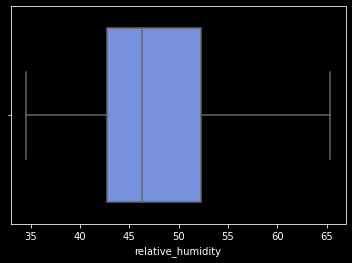

In [60]:
sns.boxplot(x="relative_humidity", data=df)

<AxesSubplot:xlabel='relative_humidity', ylabel='Count'>

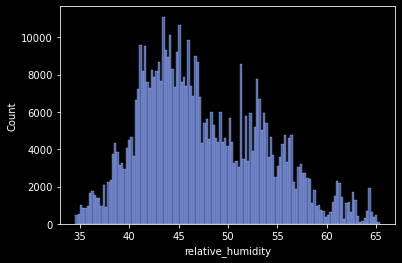

In [24]:
sns.histplot(x="relative_humidity", data=df)

Data description:
+ type: Continuous numerical
+ distribution: Negatively skewed

## light_sensors

Wavelength in nm at reading time

In [25]:
df['light_sensor_one_wavelength'].describe()

count    540364.000000
mean        221.079310
std          49.571051
min         122.860000
25%         188.570000
50%         210.000000
75%         247.140000
max         482.860000
Name: light_sensor_one_wavelength, dtype: float64

<AxesSubplot:xlabel='light_sensor_one_wavelength'>

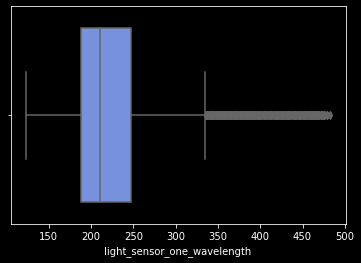

In [61]:
sns.boxplot(x="light_sensor_one_wavelength", data=df)

<AxesSubplot:xlabel='light_sensor_one_wavelength', ylabel='Count'>

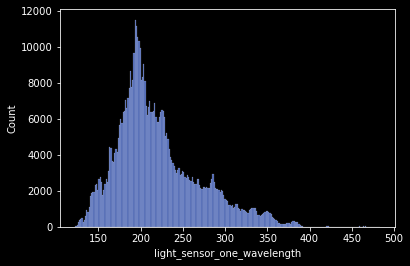

In [26]:
sns.histplot(x="light_sensor_one_wavelength", data=df)

In [27]:
df['light_sensor_two_wavelength'].describe()

count    540364.000000
mean        750.931825
std         354.825810
min         280.600000
25%         501.400000
50%         634.800000
75%         887.800000
max        2401.200000
Name: light_sensor_two_wavelength, dtype: float64

<AxesSubplot:xlabel='light_sensor_two_wavelength'>

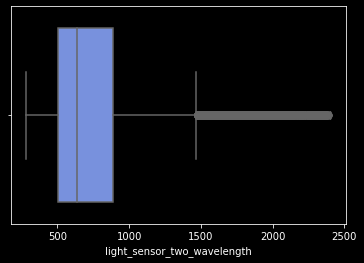

In [62]:
sns.boxplot(x="light_sensor_two_wavelength", data=df)

<AxesSubplot:xlabel='light_sensor_two_wavelength', ylabel='Count'>

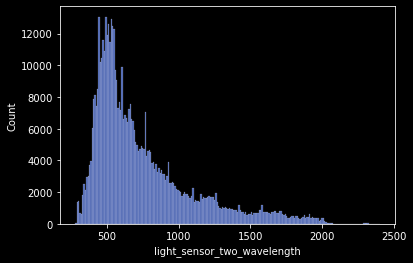

In [28]:
sns.histplot(x="light_sensor_two_wavelength", data=df)

Data description:
+ type: Continuous numerical
+ distribution: Negatively skewed

# number_occupants

Amount of people in the room at the time of the reading

In [29]:
df['number_occupants'].describe()

count    540364.000000
mean          0.593944
std           0.752355
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: number_occupants, dtype: float64

<AxesSubplot:xlabel='number_occupants', ylabel='count'>

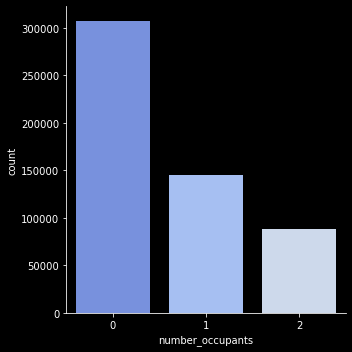

In [30]:
sns.catplot(x="number_occupants", data=df, kind='count', order=[0,1,2]).facet_axis(0, 0)

Data description:
+ type: Discrete numerical
+ distribution: Positvely skewed

## activity_occupants

Activity the occupants were doing at the time off the reading (0 = n/a, 1 = read, 2 = stand, 3 = walk, 4 = work)

In [31]:
df['activity_occupants'].describe()

count    540364.000000
mean          1.035256
std           1.436075
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max           4.000000
Name: activity_occupants, dtype: float64

<AxesSubplot:xlabel='activity_occupants', ylabel='count'>

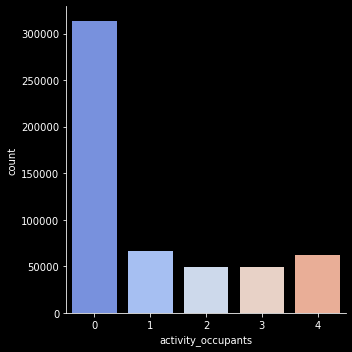

In [32]:
sns.catplot(x="activity_occupants", data=df, kind='count', order=[0,1,2,3,4]).facet_axis(0, 0)

Data description:
+ type: Discrete numerical
+ distribution: Positvely skewed

## door_state
Was the door open or closed

In [33]:
df['door_state'].describe()

count    540364.000000
mean          0.119542
std           0.324425
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: door_state, dtype: float64

<AxesSubplot:xlabel='door_state', ylabel='count'>

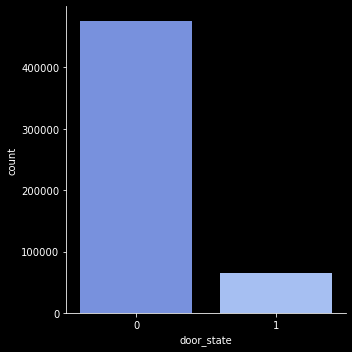

In [34]:
sns.catplot(x="door_state", data=df, kind='count', order=[0,1]).facet_axis(0, 0)

Data description:
+ type: Discrete numerical
+ distribution: Positvely skewed

## window_state
Was the window open or closed

In [35]:
df['window_state'].describe()

count    540364.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: window_state, dtype: float64

<AxesSubplot:xlabel='window_state', ylabel='count'>

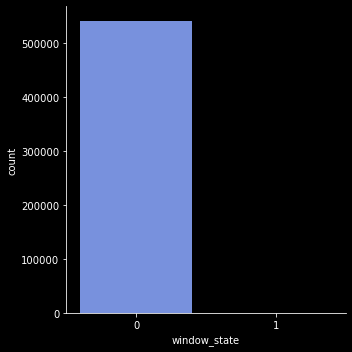

In [36]:
sns.catplot(x="window_state", data=df, kind='count', order=[0,1]).facet_axis(0, 0)

Data description:
+ type: Discrete numerical
+ distribution: Positvely skewed

## acceptability_80
Acceptability for 80% occupants

In [37]:
df['acceptability_80'].describe()

count    540364.000000
mean          0.611717
std           0.487360
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: acceptability_80, dtype: float64

<AxesSubplot:xlabel='acceptability_80', ylabel='count'>

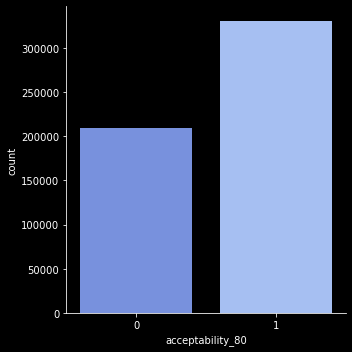

In [38]:
sns.catplot(x="acceptability_80", data=df, kind='count', order=[0,1]).facet_axis(0, 0)

Data description:
+ type: Discrete numerical
+ distribution: Negatively skewed

## acceptability_90
Acceptability for 90% occupants

In [39]:
df['acceptability_90'].describe()

count    540364.000000
mean          0.417654
std           0.493173
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: acceptability_90, dtype: float64

<AxesSubplot:xlabel='acceptability_90', ylabel='count'>

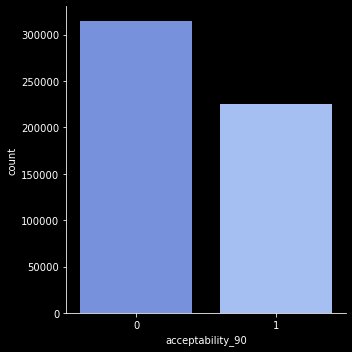

In [40]:
sns.catplot(x="acceptability_90", data=df, kind='count', order=[0,1]).facet_axis(0, 0)

Data description:
+ type: Discrete numerical
+ distribution: Positively skewed

## tmp_cmf
Comfort temperature a that specific running mean temperature, in °C

In [41]:
df['tmp_cmf'].describe()

count    540364.000000
mean         21.088677
std           0.410038
min          20.900000
25%          20.900000
50%          20.900000
75%          21.024000
max          22.357000
Name: tmp_cmf, dtype: float64

<AxesSubplot:xlabel='tmp_cmf'>

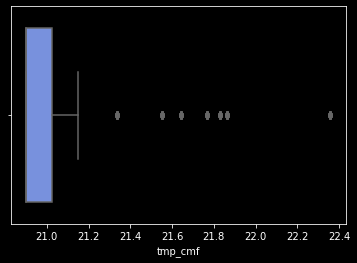

In [64]:
sns.boxplot(x="tmp_cmf", data=df)

<AxesSubplot:xlabel='tmp_cmf', ylabel='Count'>

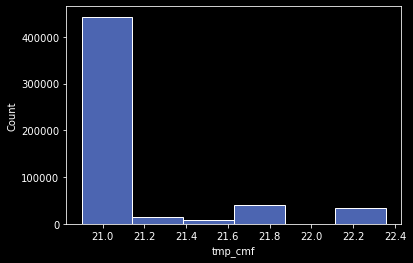

In [42]:
sns.histplot(x="tmp_cmf", data=df, bins=6)

Data description:
+ type: Continuous numerical
+ distribution: Positively skewed

## tmp_cmf_80_low

Lower acceptable comfort temperature for 80% occupants, in °C

In [43]:
df['tmp_cmf_80_low'].describe()

count    540364.000000
mean         21.488677
std           0.410038
min          21.300000
25%          21.300000
50%          21.300000
75%          21.424000
max          22.757000
Name: tmp_cmf_80_low, dtype: float64

<AxesSubplot:xlabel='tmp_cmf_80_low'>

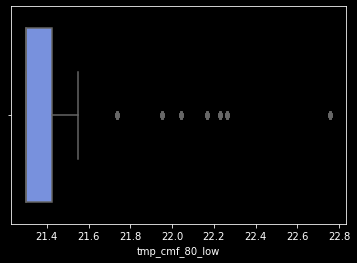

In [65]:
sns.boxplot(x="tmp_cmf_80_low", data=df)

<AxesSubplot:xlabel='tmp_cmf_80_low', ylabel='Count'>

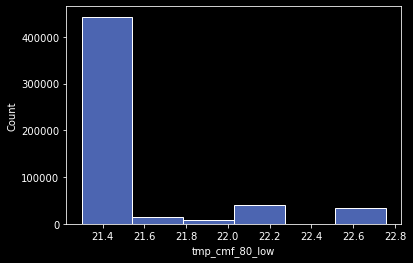

In [44]:
sns.histplot(x="tmp_cmf_80_low", data=df, bins=6)

Data description:
+ type: Continuous numerical
+ distribution: Positively skewed

## tmp_cmf_80_up

Upper acceptable comfort temperature for 80% occupants, in °C

In [45]:
df['tmp_cmf_80_up'].describe()

count    540364.000000
mean         22.688677
std           0.410038
min          22.500000
25%          22.500000
50%          22.500000
75%          22.624000
max          23.957000
Name: tmp_cmf_80_up, dtype: float64

<AxesSubplot:xlabel='tmp_cmf_80_up'>

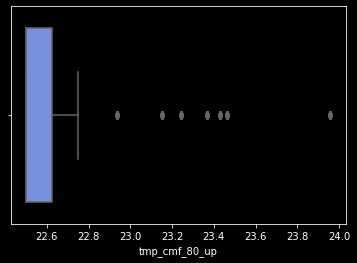

In [66]:
sns.boxplot(x="tmp_cmf_80_up", data=df)

<AxesSubplot:xlabel='tmp_cmf_80_up', ylabel='Count'>

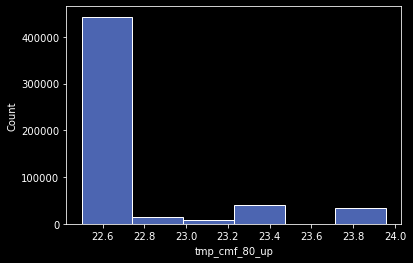

In [46]:
sns.histplot(x="tmp_cmf_80_up", data=df, bins=6)

Data description:
+ type: Continuous numerical
+ distribution: Positively skewed

## tmp_cmf_90_low

Lower acceptable comfort temperature for 90% occupants, in °C

In [47]:
df['tmp_cmf_90_low'].describe()

count    540364.000000
mean         21.288677
std           0.410038
min          21.100000
25%          21.100000
50%          21.100000
75%          21.224000
max          22.557000
Name: tmp_cmf_90_low, dtype: float64

<AxesSubplot:xlabel='tmp_cmf_90_low'>

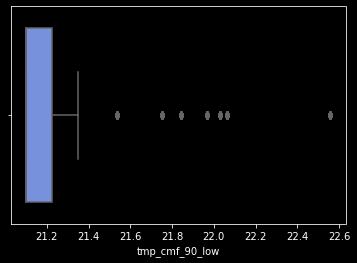

In [67]:
sns.boxplot(x="tmp_cmf_90_low", data=df)

<AxesSubplot:xlabel='tmp_cmf_90_low', ylabel='Count'>

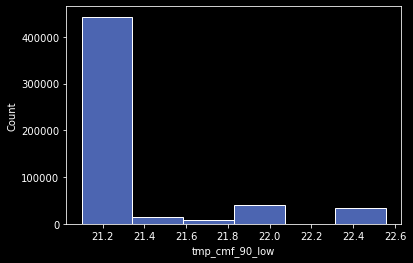

In [48]:
sns.histplot(x="tmp_cmf_90_low", data=df, bins=6)

Data description:
+ type: Continuous numerical
+ distribution: Positively skewed

## tmp_cmf_90_up
Upper acceptable comfort temperature for 90% occupants, in °C

In [49]:
df['tmp_cmf_90_up'].describe()

count    540364.000000
mean         22.188677
std           0.410038
min          22.000000
25%          22.000000
50%          22.000000
75%          22.124000
max          23.457000
Name: tmp_cmf_90_up, dtype: float64

<AxesSubplot:xlabel='tmp_cmf_90_up'>

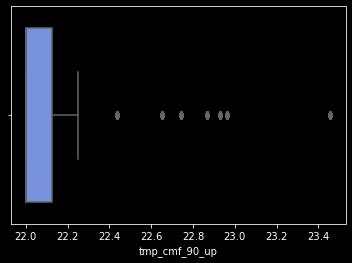

In [68]:
sns.boxplot(x="tmp_cmf_90_up", data=df)

<AxesSubplot:xlabel='tmp_cmf_90_up', ylabel='Count'>

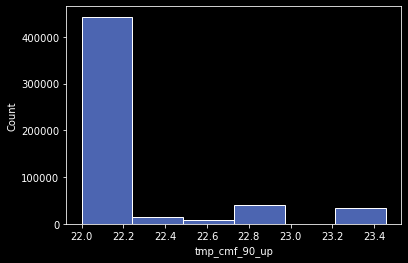

In [50]:
sns.histplot(x="tmp_cmf_90_up", data=df, bins=6)

Data description:
+ type: Continuous numerical
+ distribution: Positively skewed